In [1]:
from tomographic_lensing import *
from CovMat import *
import gc

In [2]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,
    transfer_function='bbks')

ell = np.arange(2, 10001)

In [15]:
dndz1=GalaxyDistr(zi=0.001, zf=4.0, n_eff=10.024, z0=0.13, alpha=0.78)
#n_eff is chosen from the last column of Table F1,"https://arxiv.org/abs/1809.01669" LSST Science Requirements Document
#z0 and alpha are from Figure F4, Y1 of the same document

In [16]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
num_den_per_str = arcmin_per_str*10.024/0.28**2

In [17]:
#dividing the galaxy distribution into 8 redshift bins
#Z stands for dividing into bins of equal redshifts
#N stands for dividing into bins of equal number of galaxies

redshifts = {} #initializing redshift dictionary 
cl = {} 
cov = {}

for rbins in range(1,9):
    for rbin_type in ["z", "n"]:
        cov["{0}_{1}".format(rbin_type, rbins)], cl["{0}_{1}".format(rbin_type, rbins)], redshifts["{0}_{1}".format(rbin_type, rbins)] = getDataArray(rbins = rbins, rbin_type = rbin_type, cosmo = cosmo, dndz = dndz1, ell = ell, fsky = 0.4, num_den_per_str = num_den_per_str)

In [18]:
redshifts["n_8"]

[0.001,
 0.27160902255639097,
 0.40190225563909776,
 0.5221729323308271,
 0.6524661654135339,
 0.8028045112781955,
 1.0032556390977443,
 1.3239774436090224,
 3.9899774436090225]

In [19]:
#binning in log base 10 space
bins_l = {}
for j in range(2,6):
    bins_l["s{0}0".format(j)] = 10**np.linspace(np.log10(50), np.log10(8500), 10*j)

print(bins_l)

{'s20': array([  50.        ,   65.51821439,   85.85272835,  112.49834924,
        147.41381929,  193.16580433,  253.11757164,  331.67622651,
        434.61668235,  569.50617946,  746.26055928,  977.87318633,
       1281.37010143, 1679.06162046, 2200.18238458, 2883.04042355,
       3777.8332115 , 4950.33772587, 6486.74576886, 8500.        ]), 's30': array([  50.        ,   59.68731407,   71.25150923,   85.05622419,
        101.53555135,  121.20768686,  144.69122548,  172.72461238,
        206.18936375,  246.13778626,  293.82606709,  350.75377499,
        418.71101462,  499.83471672,  596.67583444,  712.27955863,
        850.28107449, 1015.0198709 , 1211.67619653, 1446.43395398,
       1726.675154  , 2061.21204443, 2460.56421341, 2937.28938014,
       3506.37827521, 4185.72602754, 4996.69488073, 5964.78593364,
       7120.44102819, 8500.        ]), 's40': array([  50.        ,   57.03756836,   65.0656841 ,   74.2237681 ,
         84.67086494,   96.58840495,  110.18335502,  125.69181289,

In [20]:
stn = {}
for i in ["z", "n"]:
    for j in [4, 8]:
        for k in range(2,6):
            stn["s{0}0_{1}_{2}".format(k, i, j)] = SignalToNoise(bins_in_z = j, binl = bins_l["s{0}0".format(k)], cl = cl["{0}_{1}".format(i, j)], cov = cov["{0}_{1}".format(i, j)], ell=ell)

In [21]:
print(stn)

{'s20_z_4': 1550.5872849799641, 's30_z_4': 1553.933427199795, 's40_z_4': 1555.0630356061356, 's50_z_4': 1555.5796558320371, 's20_z_8': 2219.6268967282053, 's30_z_8': 2226.233997738788, 's40_z_8': 2228.4776724931667, 's50_z_8': 2229.503252368331, 's20_n_4': 714.9728085885675, 's30_n_4': 716.150339426203, 's40_n_4': 716.5502283989541, 's50_n_4': 716.7413574186786, 's20_n_8': 1088.2711917650315, 's30_n_8': 1090.3637086271358, 's40_n_8': 1091.0743741076765, 's50_n_8': 1091.4055509569416}


In [22]:
def SignalToNoise_o(cl, cov):
    """calculate the signal to noise for the given cl signal, and covariance array, without binning in l"""
    stn_sq = 0
    for i in range(cl.shape[1]):
        stn_sq = stn_sq + np.matmul(cl[:, i].T, 
                                    np.matmul(np.linalg.inv(cov[i,:,:]), cl[:, i]))
    stn = np.sqrt(stn_sq)
    return stn

In [23]:
for i in ["z", "n"]:
    for j in range(1,9):
        stn["{0}_{1}".format(i,j)] = SignalToNoise_o(cl = cl["{0}_{1}".format(i, j)], cov = cov["{0}_{1}".format(i, j)])

In [14]:
stn

{'s20_z_4': 1548.4616808756066,
 's30_z_4': 1551.799991410815,
 's40_z_4': 1552.926963992122,
 's50_z_4': 1553.4423938182615,
 's20_z_8': 2217.1396508209064,
 's30_z_8': 2223.731050231711,
 's40_z_8': 2225.969257506926,
 's50_z_8': 2226.9923086580775,
 's20_n_4': 713.3016751042828,
 's30_n_4': 714.4756848223437,
 's40_n_4': 714.8743738617779,
 's50_n_4': 715.064972613009,
 's20_n_8': 1085.9466597094745,
 's30_n_8': 1088.0326845708134,
 's40_n_8': 1088.7411516401605,
 's50_n_8': 1089.0713417941222,
 'z_1': 227.08473695476704,
 'z_2': 919.9538240079709,
 'z_3': 1288.8561420667413,
 'z_4': 1554.4059405288017,
 'z_5': 1767.28031056016,
 'z_6': 1945.1477081488,
 'z_7': 2097.451081682362,
 'z_8': 2228.765546471386,
 'n_1': 227.12807384562947,
 'n_2': 438.78340489514346,
 'n_3': 590.2156032298483,
 'n_4': 715.7378075803811,
 'n_5': 827.4261265281199,
 'n_6': 921.7402834453287,
 'n_7': 1008.8358996329575,
 'n_8': 1089.9192201013211}

In [33]:
for data in stn.values():
    print(data*3)

4651.761854939892
4661.800281599385
4665.189106818407
4666.738967496111
6658.8806901846165
6678.701993216364
6685.4330174794995
6688.509757104992
2144.9184257657025
2148.451018278609
2149.6506851968625
2150.224072256036
3264.813575295095
3271.0911258814076
3273.223122323029
3274.216652870825
682.3613845141708
2764.165958718547
3862.58496874529
4669.634528012092
5308.743749957523
5837.978012982554
6289.230247728767
6693.843176940645
682.3881311836745
1319.5607200295426
1774.9120114374218
2152.2432556655785
2482.4546686438593
2771.3902172011854
3033.1131510185032
3276.7634904544216


In [27]:
import matplotlib.ticker as mtick

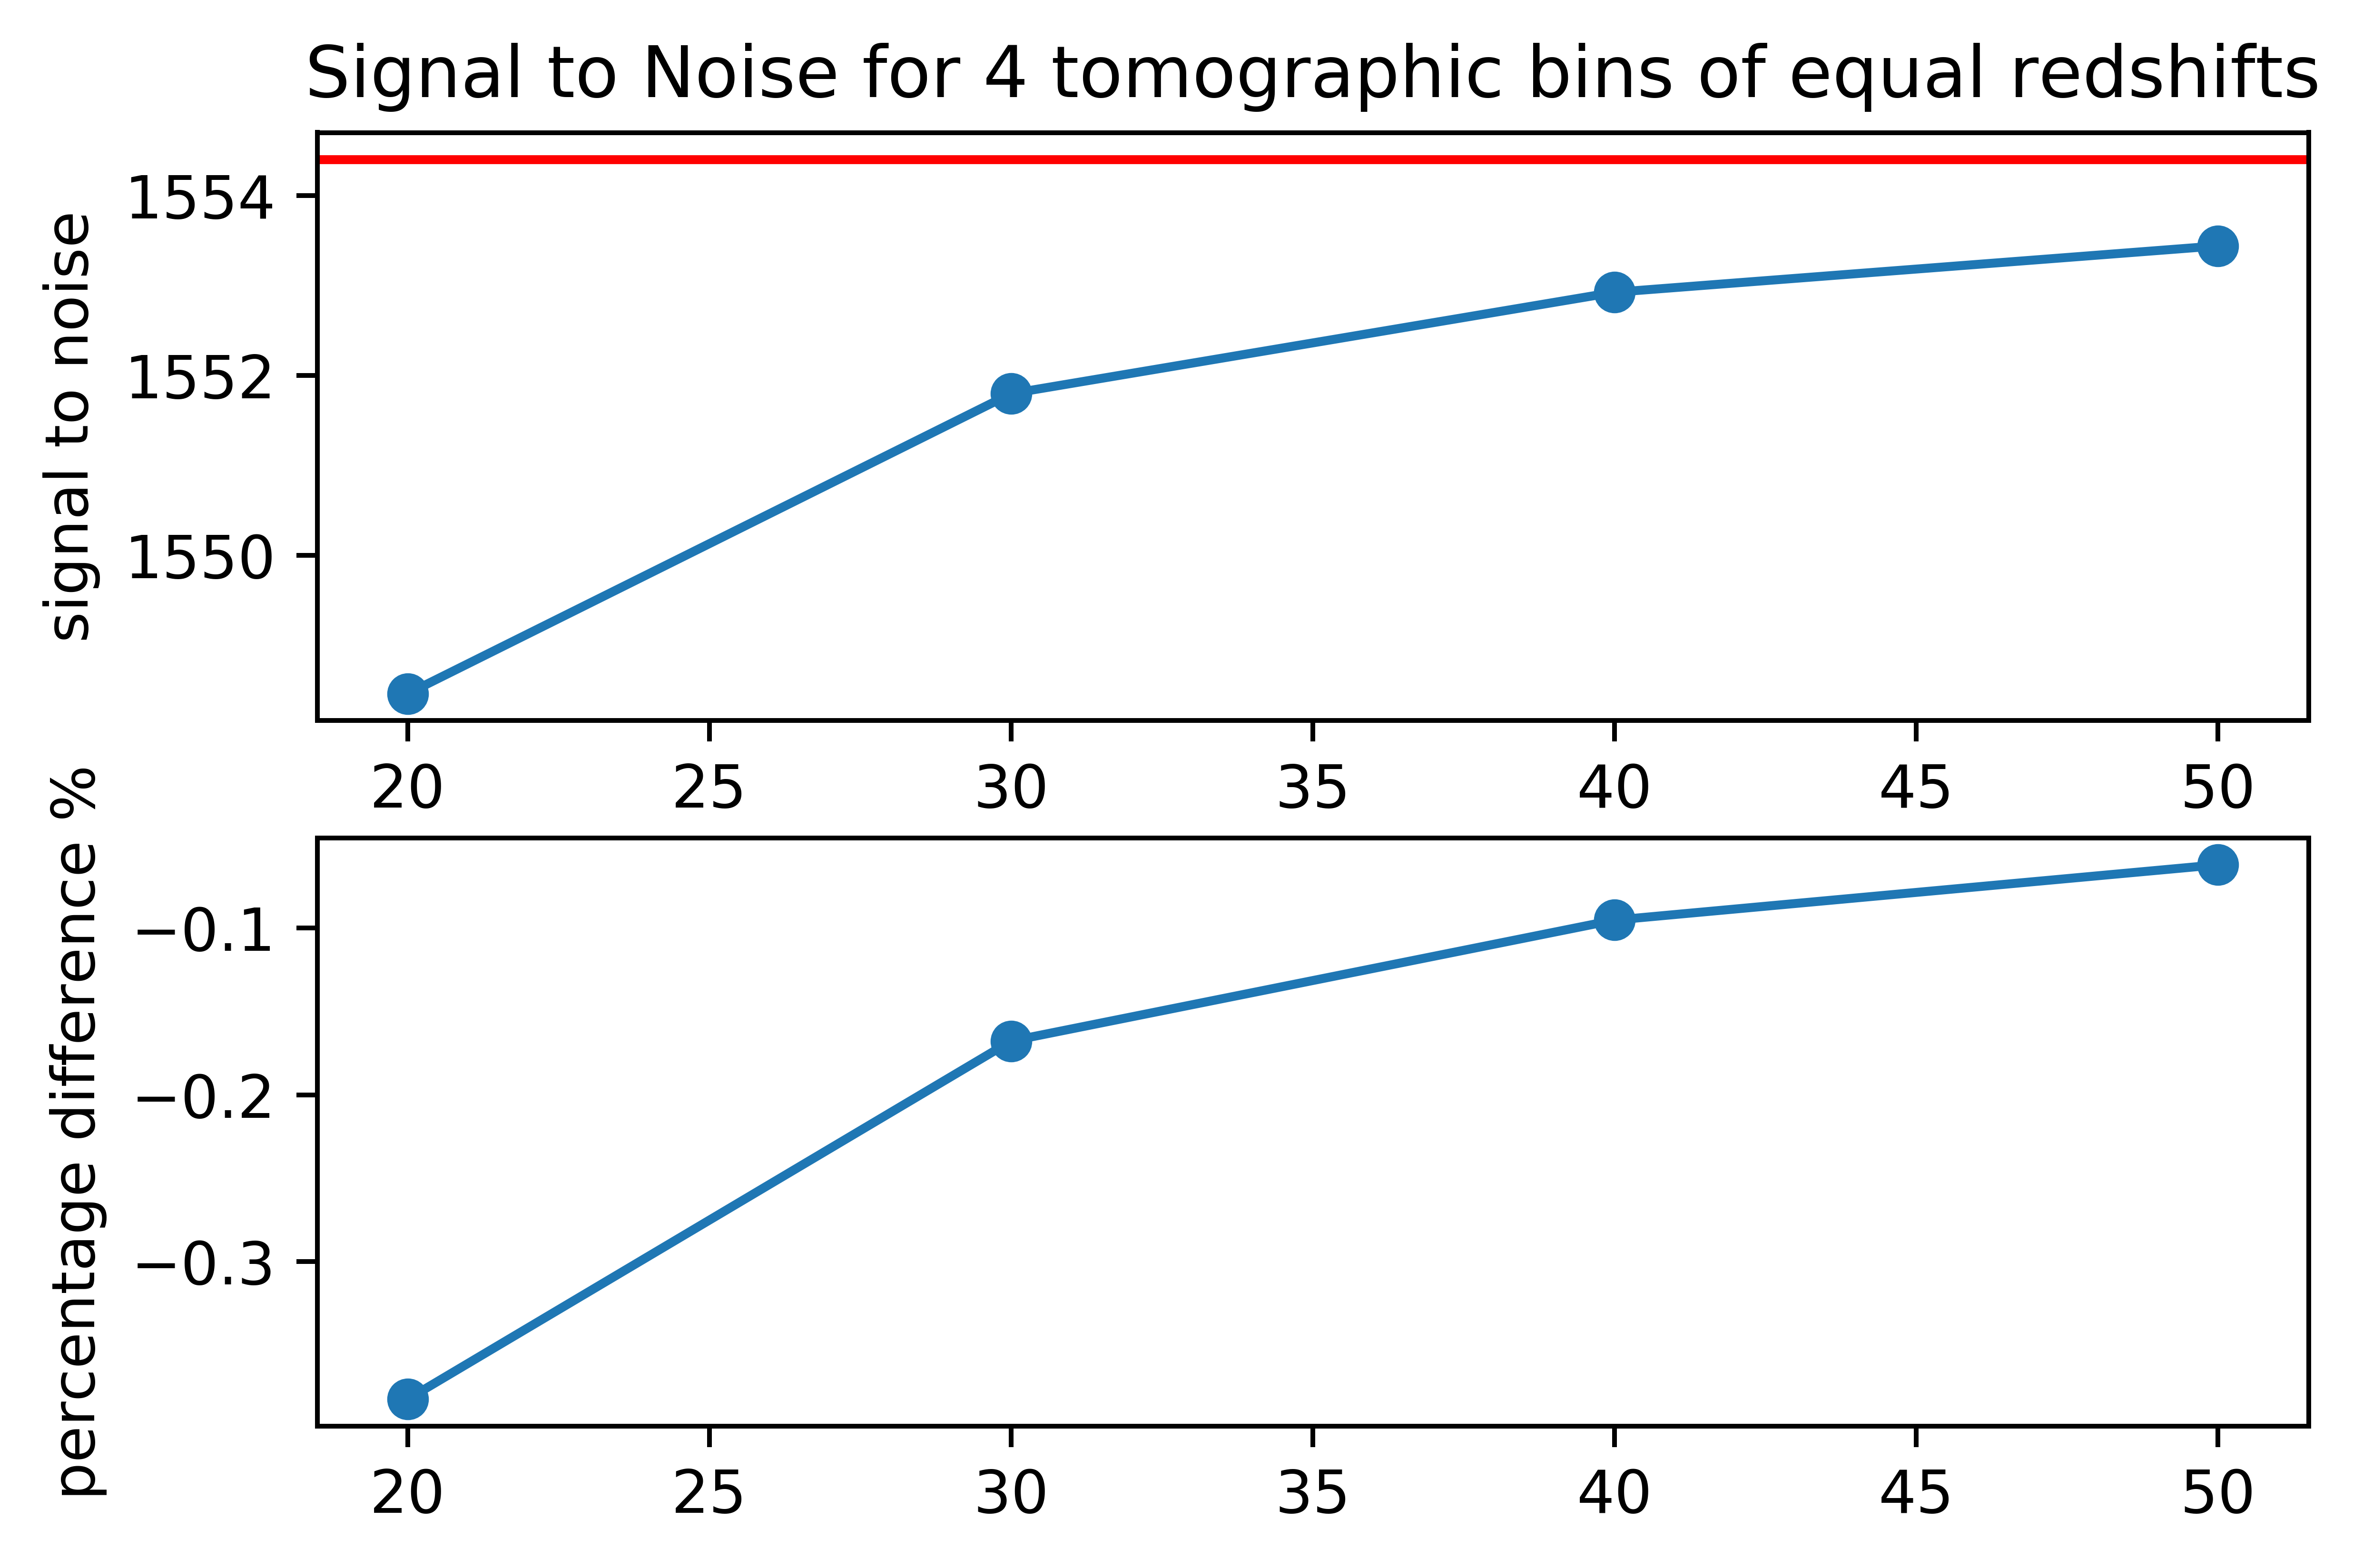

In [55]:
fig=plt.figure()
mpl.rcParams.update({'font.size': 10})
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax1.plot([20, 30 ,40, 50], [stn["s20_z_4"], stn["s30_z_4"], stn["s40_z_4"], stn["s50_z_4"]], marker='o')
ax1.axhline(stn["z_4"], color='r')
ax1.set_xlabel("number of bins in l")
ax1.set_ylabel("signal to noise")
ax1.set_title("Signal to Noise for 4 tomographic bins of equal redshifts")
ax2.plot([20, 30 ,40, 50], np.array([stn["s20_z_4"]/stn["z_4"]-1, stn["s30_z_4"]/stn["z_4"]-1,stn["s40_z_4"]/stn["z_4"]-1,stn["s50_z_4"]/stn["z_4"]-1])*100, marker='o')
ax2.set_ylabel("percentage difference %")
plt.show()

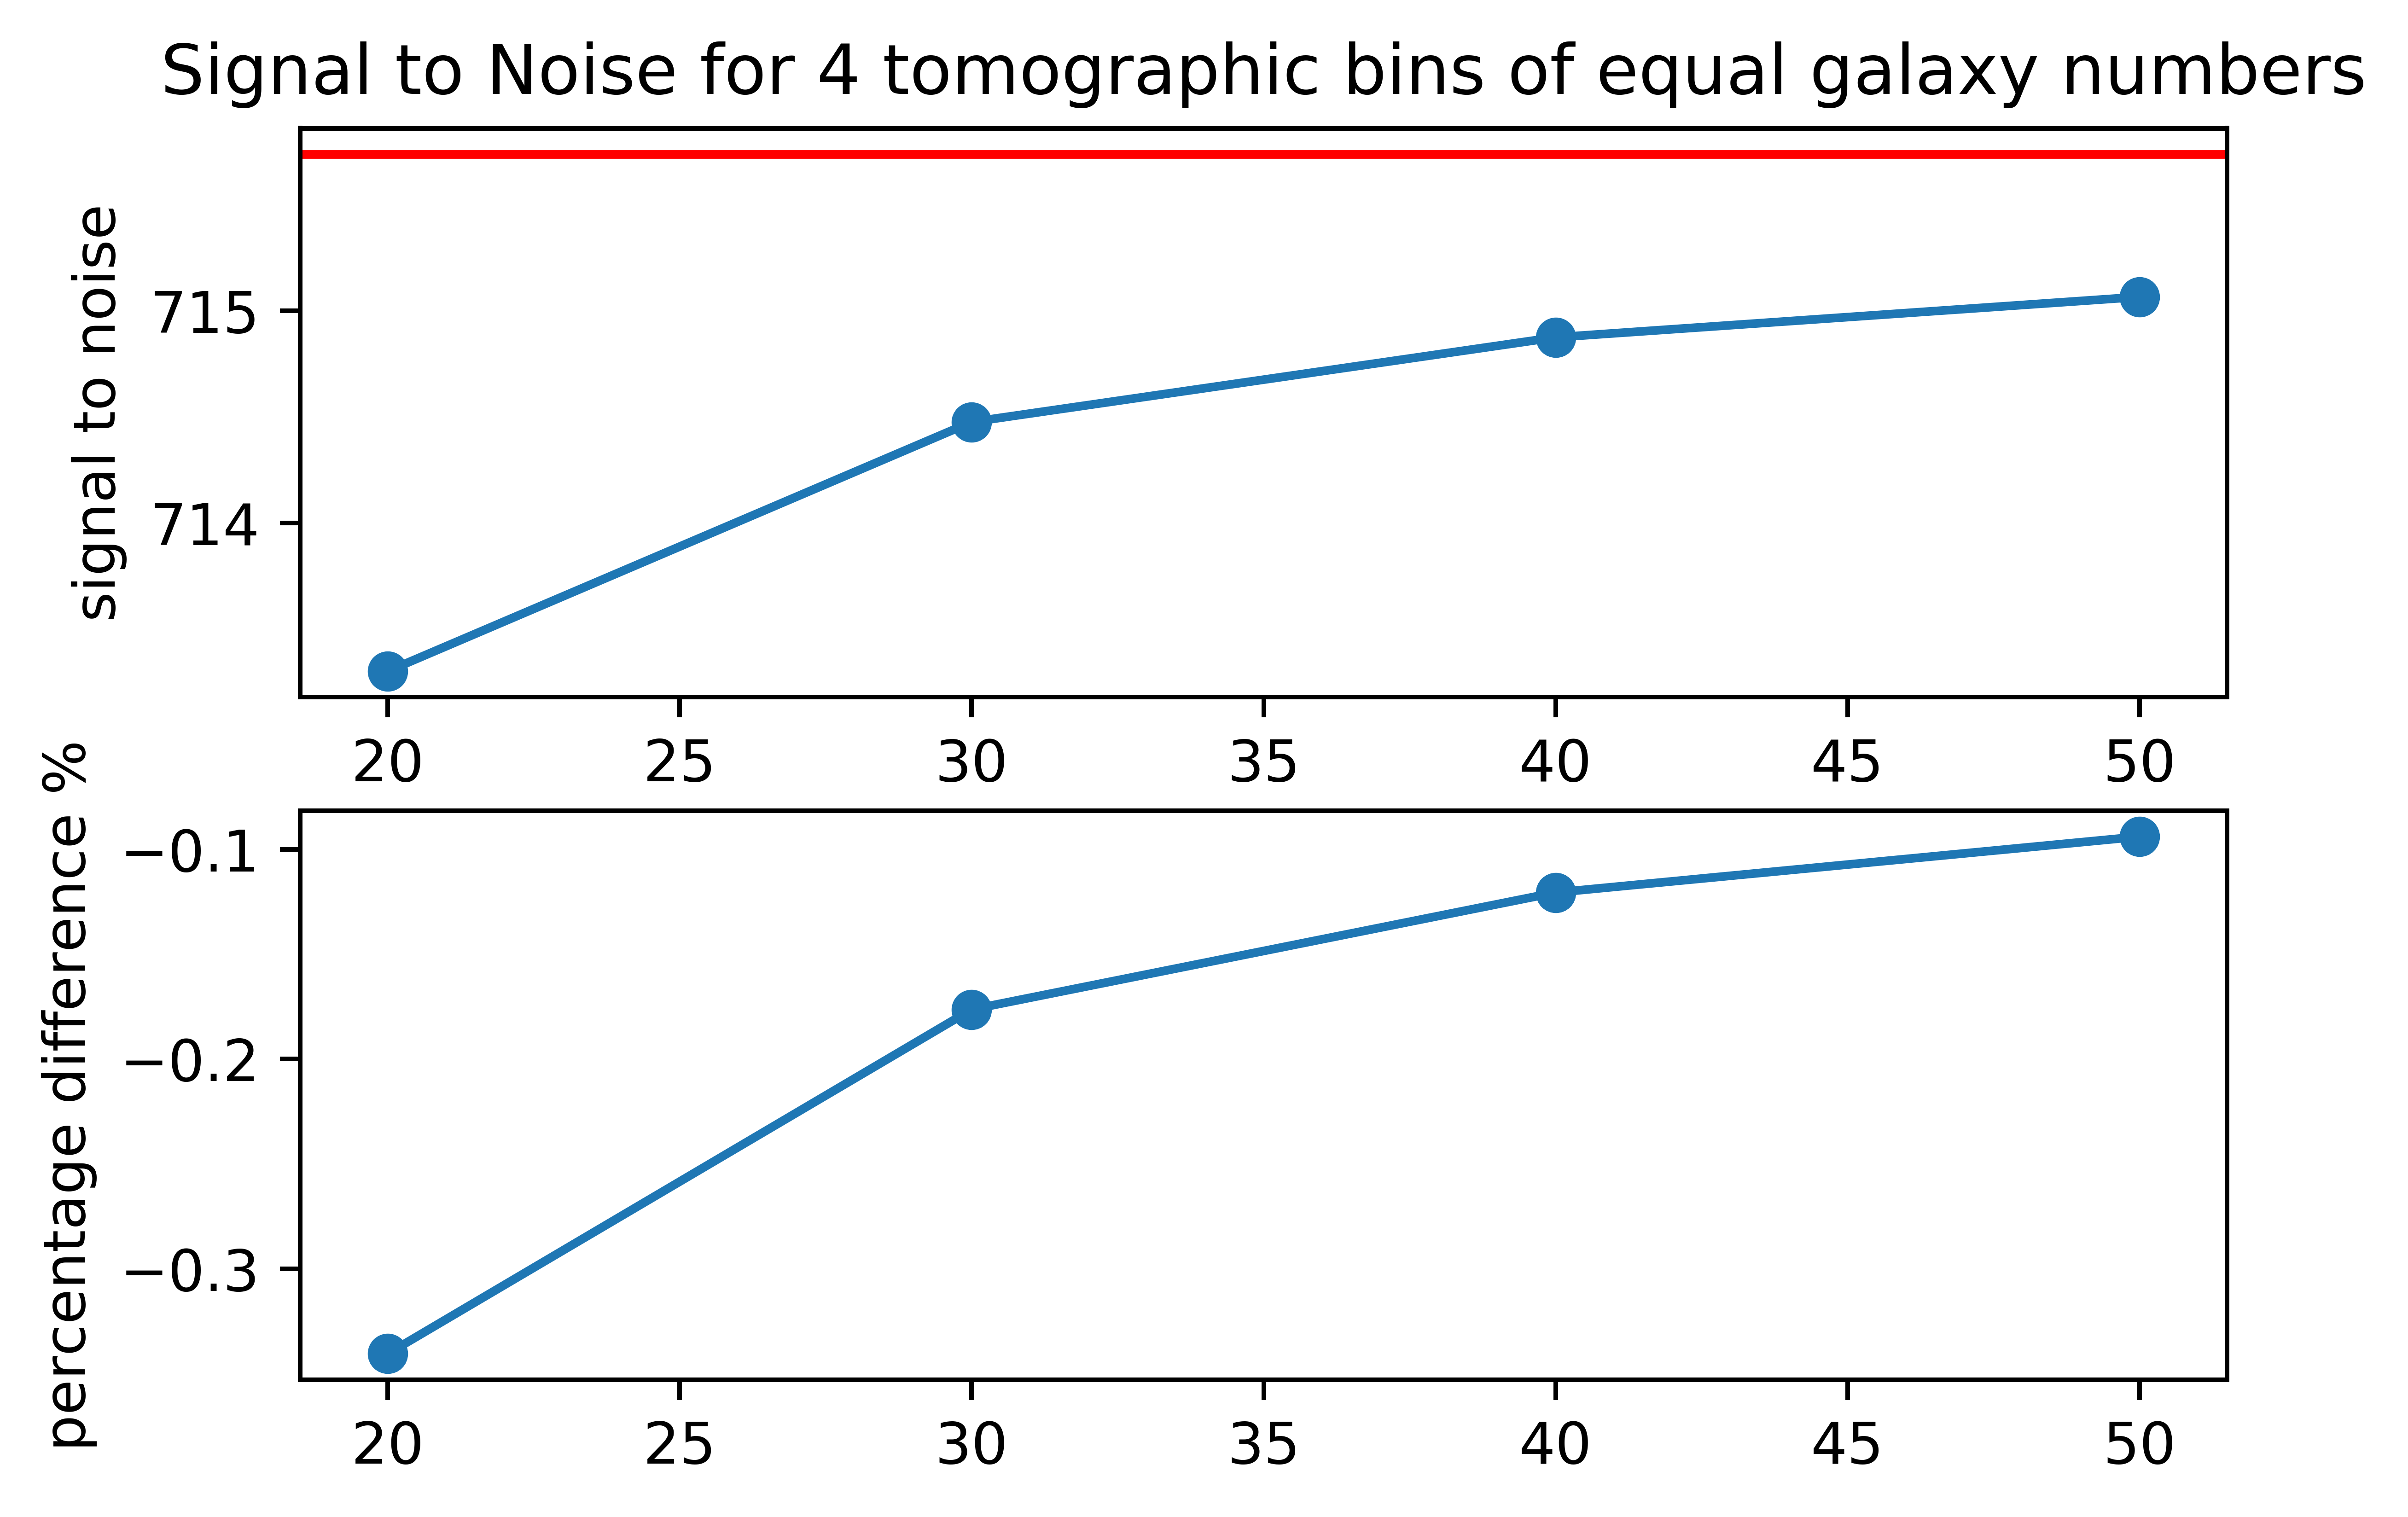

In [56]:
fig=plt.figure()
mpl.rcParams.update({'font.size': 10})
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax1.plot([20, 30 ,40, 50], [stn["s20_n_4"], stn["s30_n_4"], stn["s40_n_4"], stn["s50_n_4"]], marker='o')
ax1.axhline(stn["n_4"], color='r')
ax1.set_xlabel("number of bins in l")
ax1.set_ylabel("signal to noise")
ax1.set_title("Signal to Noise for 4 tomographic bins of equal galaxy numbers")
ax2.plot([20, 30 ,40, 50], 100*np.array([stn["s20_n_4"]/stn["n_4"]-1, stn["s30_n_4"]/stn["n_4"]-1,stn["s40_n_4"]/stn["n_4"]-1,stn["s50_n_4"]/stn["n_4"]-1]), marker='o')
ax2.set_ylabel("percentage difference %")
plt.show()

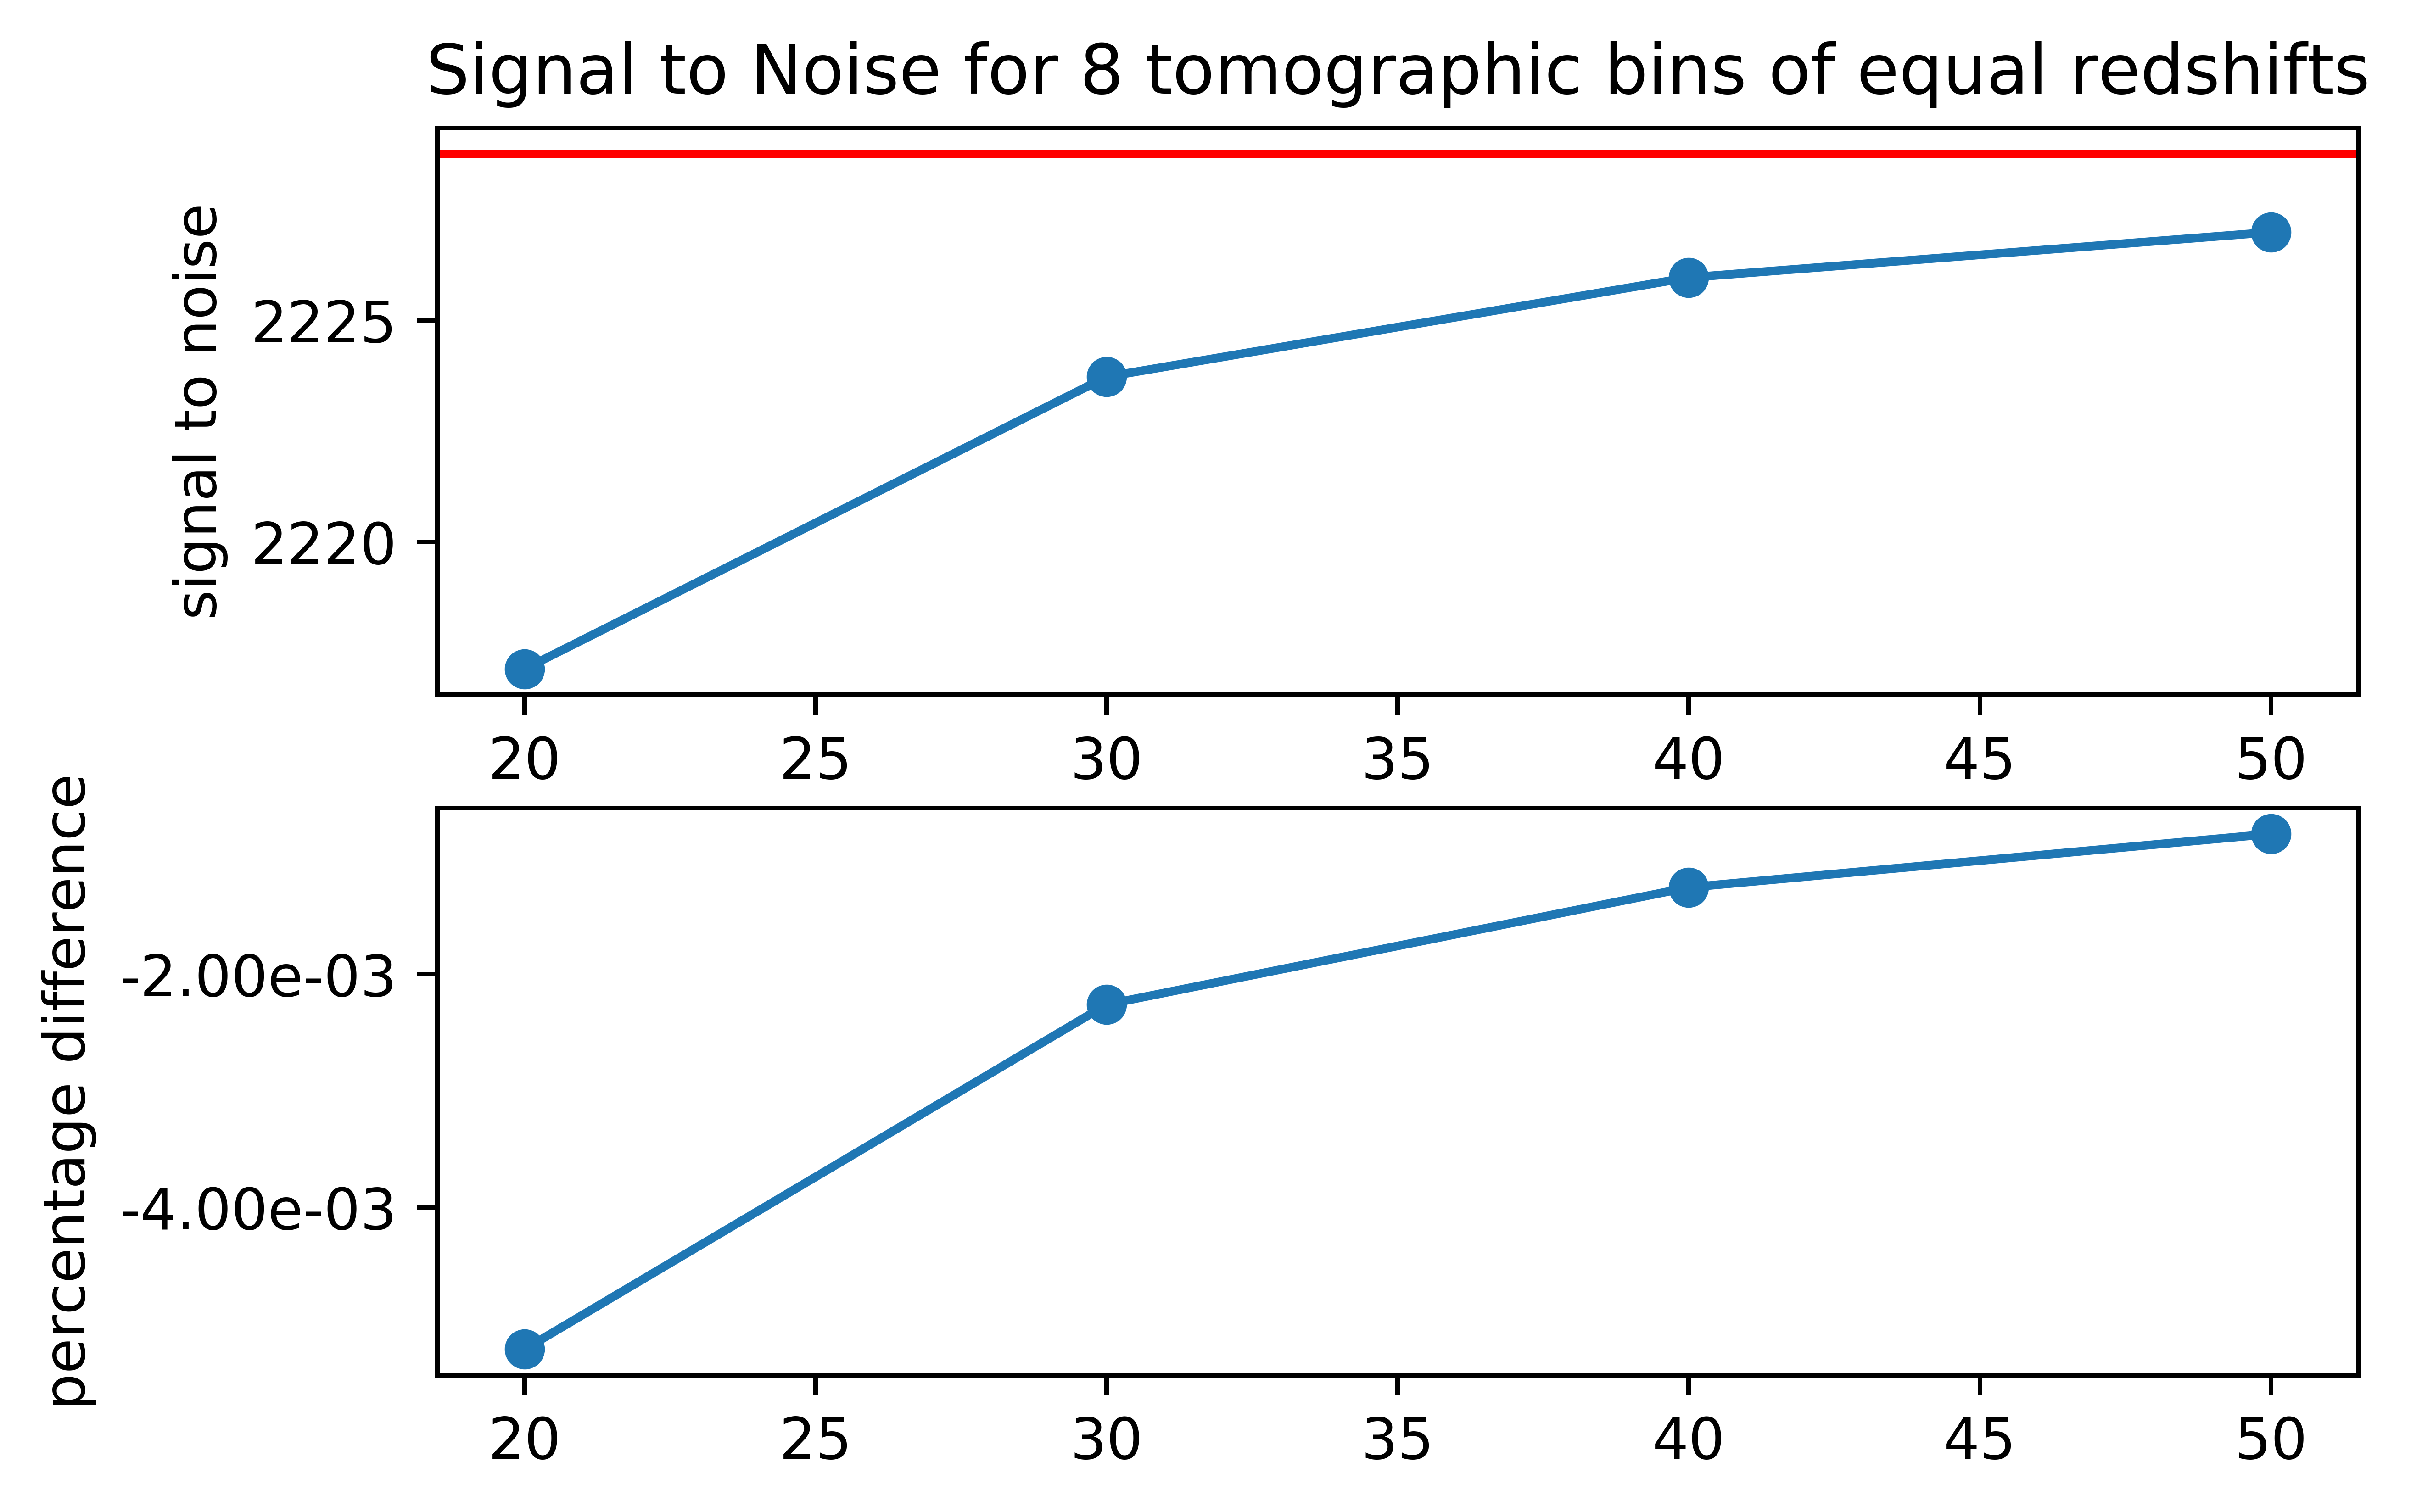

In [30]:
fig=plt.figure()
mpl.rcParams.update({'font.size': 10})
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax1.plot([20, 30 ,40, 50], [stn["s20_z_8"], stn["s30_z_8"], stn["s40_z_8"], stn["s50_z_8"]], marker='o')
ax1.axhline(stn["z_8"], color='r')
ax1.set_xlabel("number of bins in l")
ax1.set_ylabel("signal to noise")
ax1.set_title("Signal to Noise for 8 tomographic bins of equal redshifts")
ax2.plot([20, 30 ,40, 50], [stn["s20_z_8"]/stn["z_8"]-1, stn["s30_z_8"]/stn["z_8"]-1,stn["s40_z_8"]/stn["z_8"]-1,stn["s50_z_8"]/stn["z_8"]-1], marker='o')
ax2.set_ylabel("percentage difference")
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.show()  

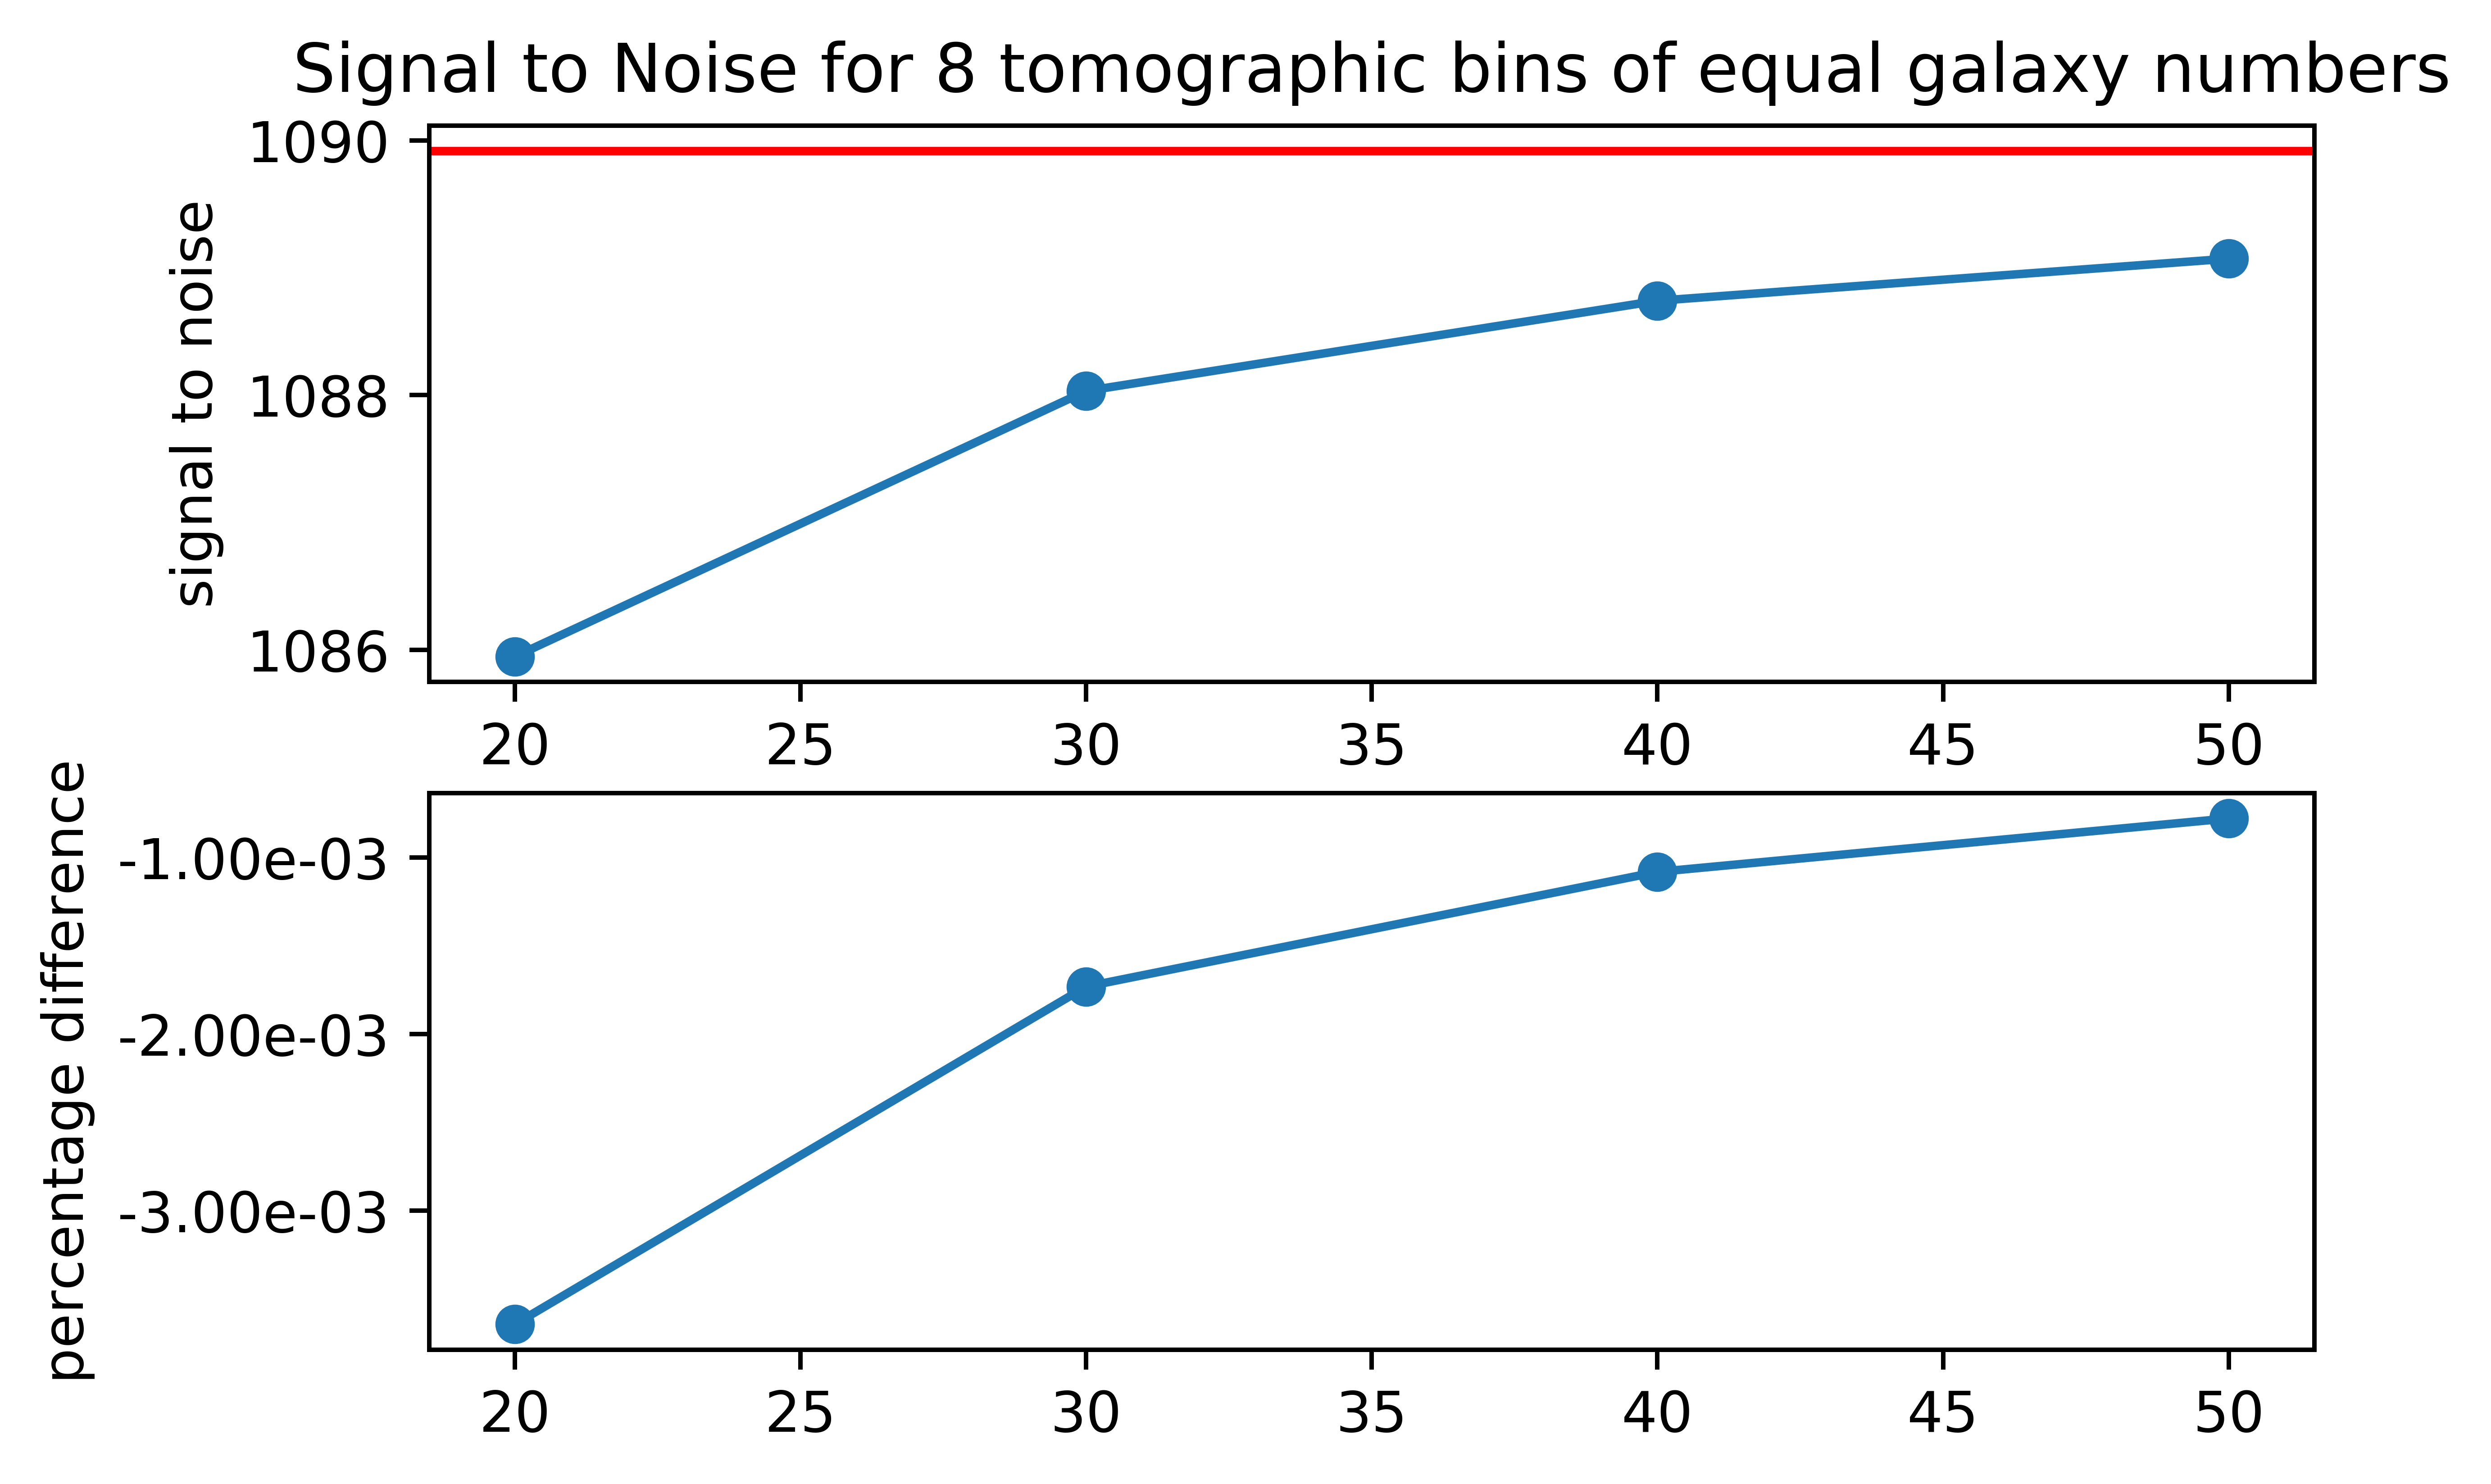

In [31]:
fig=plt.figure()
mpl.rcParams.update({'font.size': 10})
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
ax1.plot([20, 30 ,40, 50], [stn["s20_n_8"], stn["s30_n_8"], stn["s40_n_8"], stn["s50_n_8"]], marker='o')
ax1.axhline(stn["n_8"], color='r')
ax1.set_xlabel("number of bins in l")
ax1.set_ylabel("signal to noise")
ax1.set_title("Signal to Noise for 8 tomographic bins of equal galaxy numbers")
ax2.plot([20, 30 ,40, 50], [stn["s20_n_8"]/stn["n_8"]-1, stn["s30_n_8"]/stn["n_8"]-1,stn["s40_n_8"]/stn["n_8"]-1,stn["s50_n_8"]/stn["n_8"]-1], marker='o')
ax2.set_ylabel("percentage difference")
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.show() 

In [39]:
import pandas as pd

In [40]:
StN = pd.DataFrame(dict(key=list(stn.keys()),val=list(stn.values())))

In [51]:
StN[16:24].values[:,1]

array([227.08473695476704, 919.9538240079709, 1288.8561420667413,
       1554.4059405288017, 1767.28031056016, 1945.1477081488,
       2097.451081682362, 2228.765546471386], dtype=object)

In [52]:
plt.figure(figsize=(16,9))
mpl.rcParams.update({'font.size': 20})
plt.plot([1, 2 ,3, 4, 5, 6, 7, 8], StN[16:24].values[:,1], 
         label="S/N vs number of tomographic bins of equal redshifts")
plt.plot([1, 2 ,3, 4, 5, 6, 7, 8], StN[24:32].values[:,1], 
         label="S/N vs number of tomographic bins of equal galaxy number")
plt.legend()
plt.xlabel("Number of bins in l")
plt.ylabel("signal to noise")
#plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show() 

In [57]:
#check 5 tomographic bins: how much does each bin contribute to the total signal to noise
l = []
for j in range(5):
    l.extend([[j, j+i] for i in range(5-j)])

In [58]:
l

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [2, 2],
 [2, 3],
 [2, 4],
 [3, 3],
 [3, 4],
 [4, 4]]

In [68]:
cl["z_5"].shape

(15, 9999)

In [70]:
cov["z_5"][:, 0, 0].shape

(9999,)

In [88]:
def SignalToNoise_bin(cl, cov):
    """calculate the signal to noise for the given cl signal, and covariance array, without binning in l"""
    stn_sq = 0
    for i in range(len(cl)):
        stn_sq = stn_sq + cl[i]**2/cov[i]
    stn = np.sqrt(stn_sq)
    return stn

In [89]:
SignalToNoise_bin(cl["z_5"][0], cov["z_5"][:, 0, 0])

124.34978245590843

In [90]:
for i in ["z", "n"]:
    for j in [0, 5, 9, 12, 14]:
        stn["{0}_5_bin_{1}".format(i,j+1)] = SignalToNoise_bin(cl = cl["{0}_5".format(i)][j], cov = cov["{0}_5".format(i)][:, j, j])

In [91]:
stn["z_5_bin_1"]

124.34978245590843

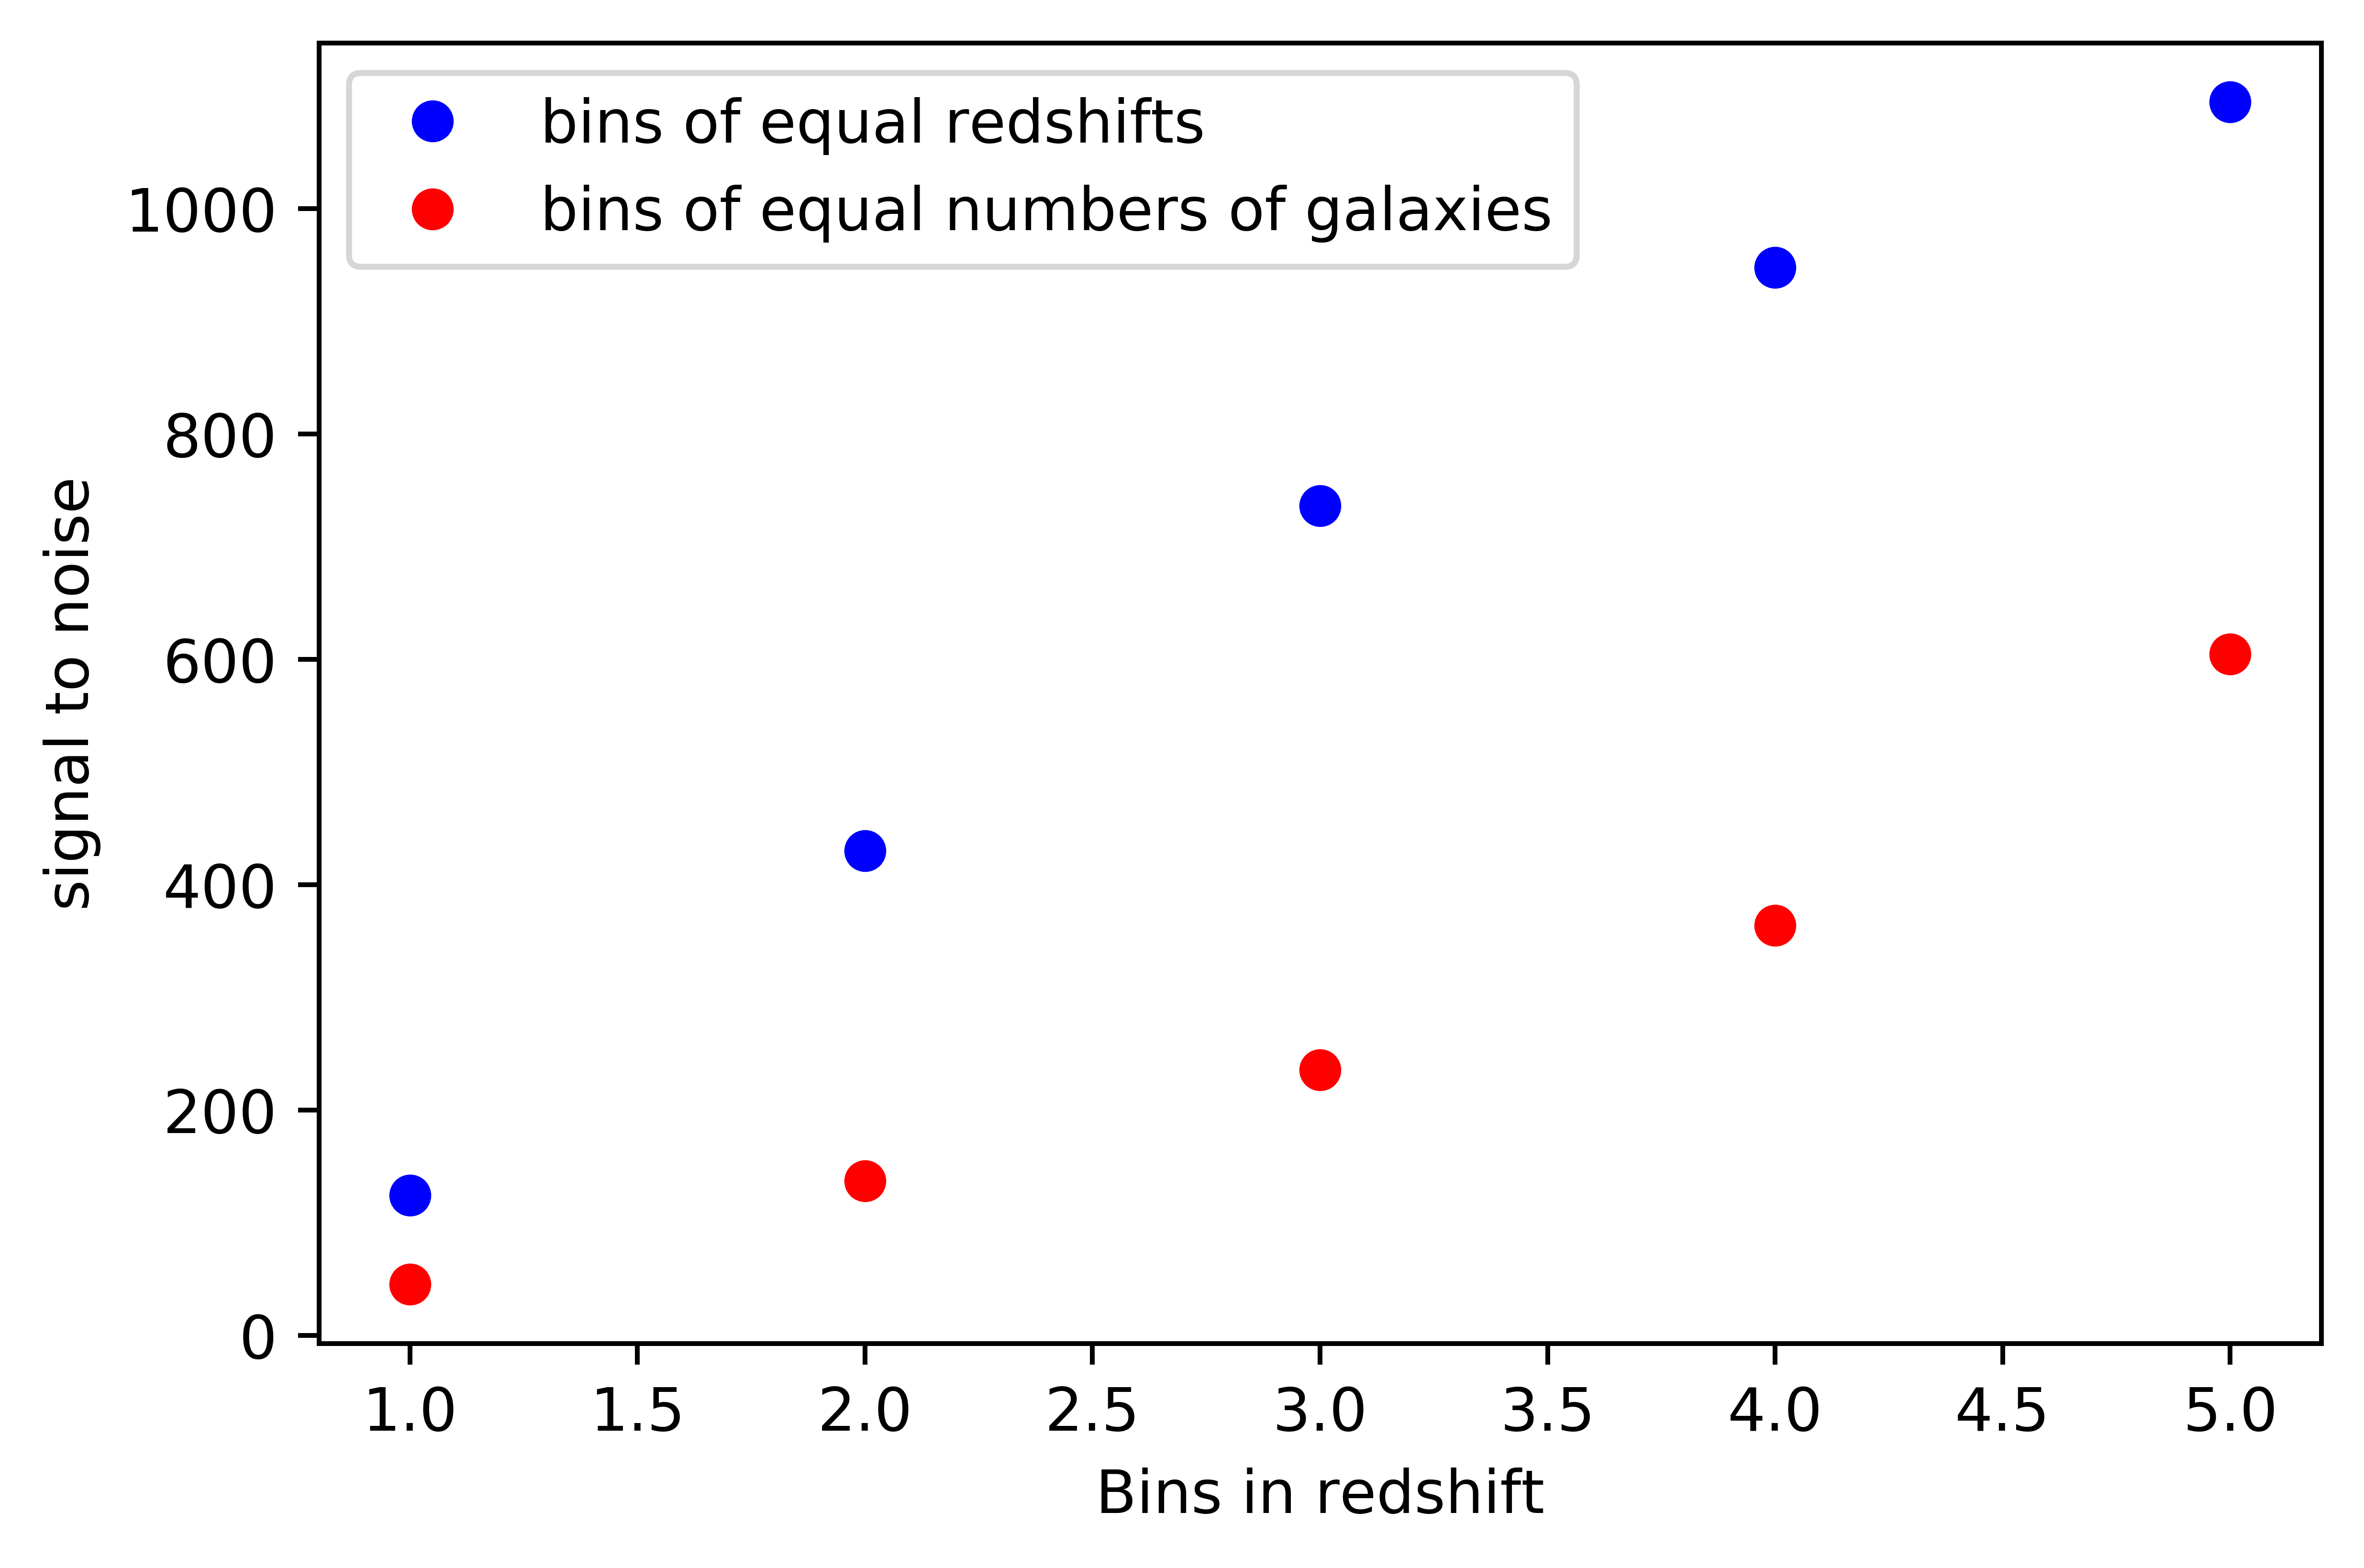

In [94]:
plt.figure
plt.plot([1, 2, 3, 4, 5], [stn["z_5_bin_1"], stn["z_5_bin_6"], stn["z_5_bin_10"], stn["z_5_bin_13"], stn["z_5_bin_15"]],
         color='b', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4, 5], [stn["n_5_bin_1"], stn["n_5_bin_6"], stn["n_5_bin_10"], stn["n_5_bin_13"], stn["n_5_bin_15"]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("Bins in redshift")
plt.ylabel("signal to noise")
plt.legend()
plt.show() 

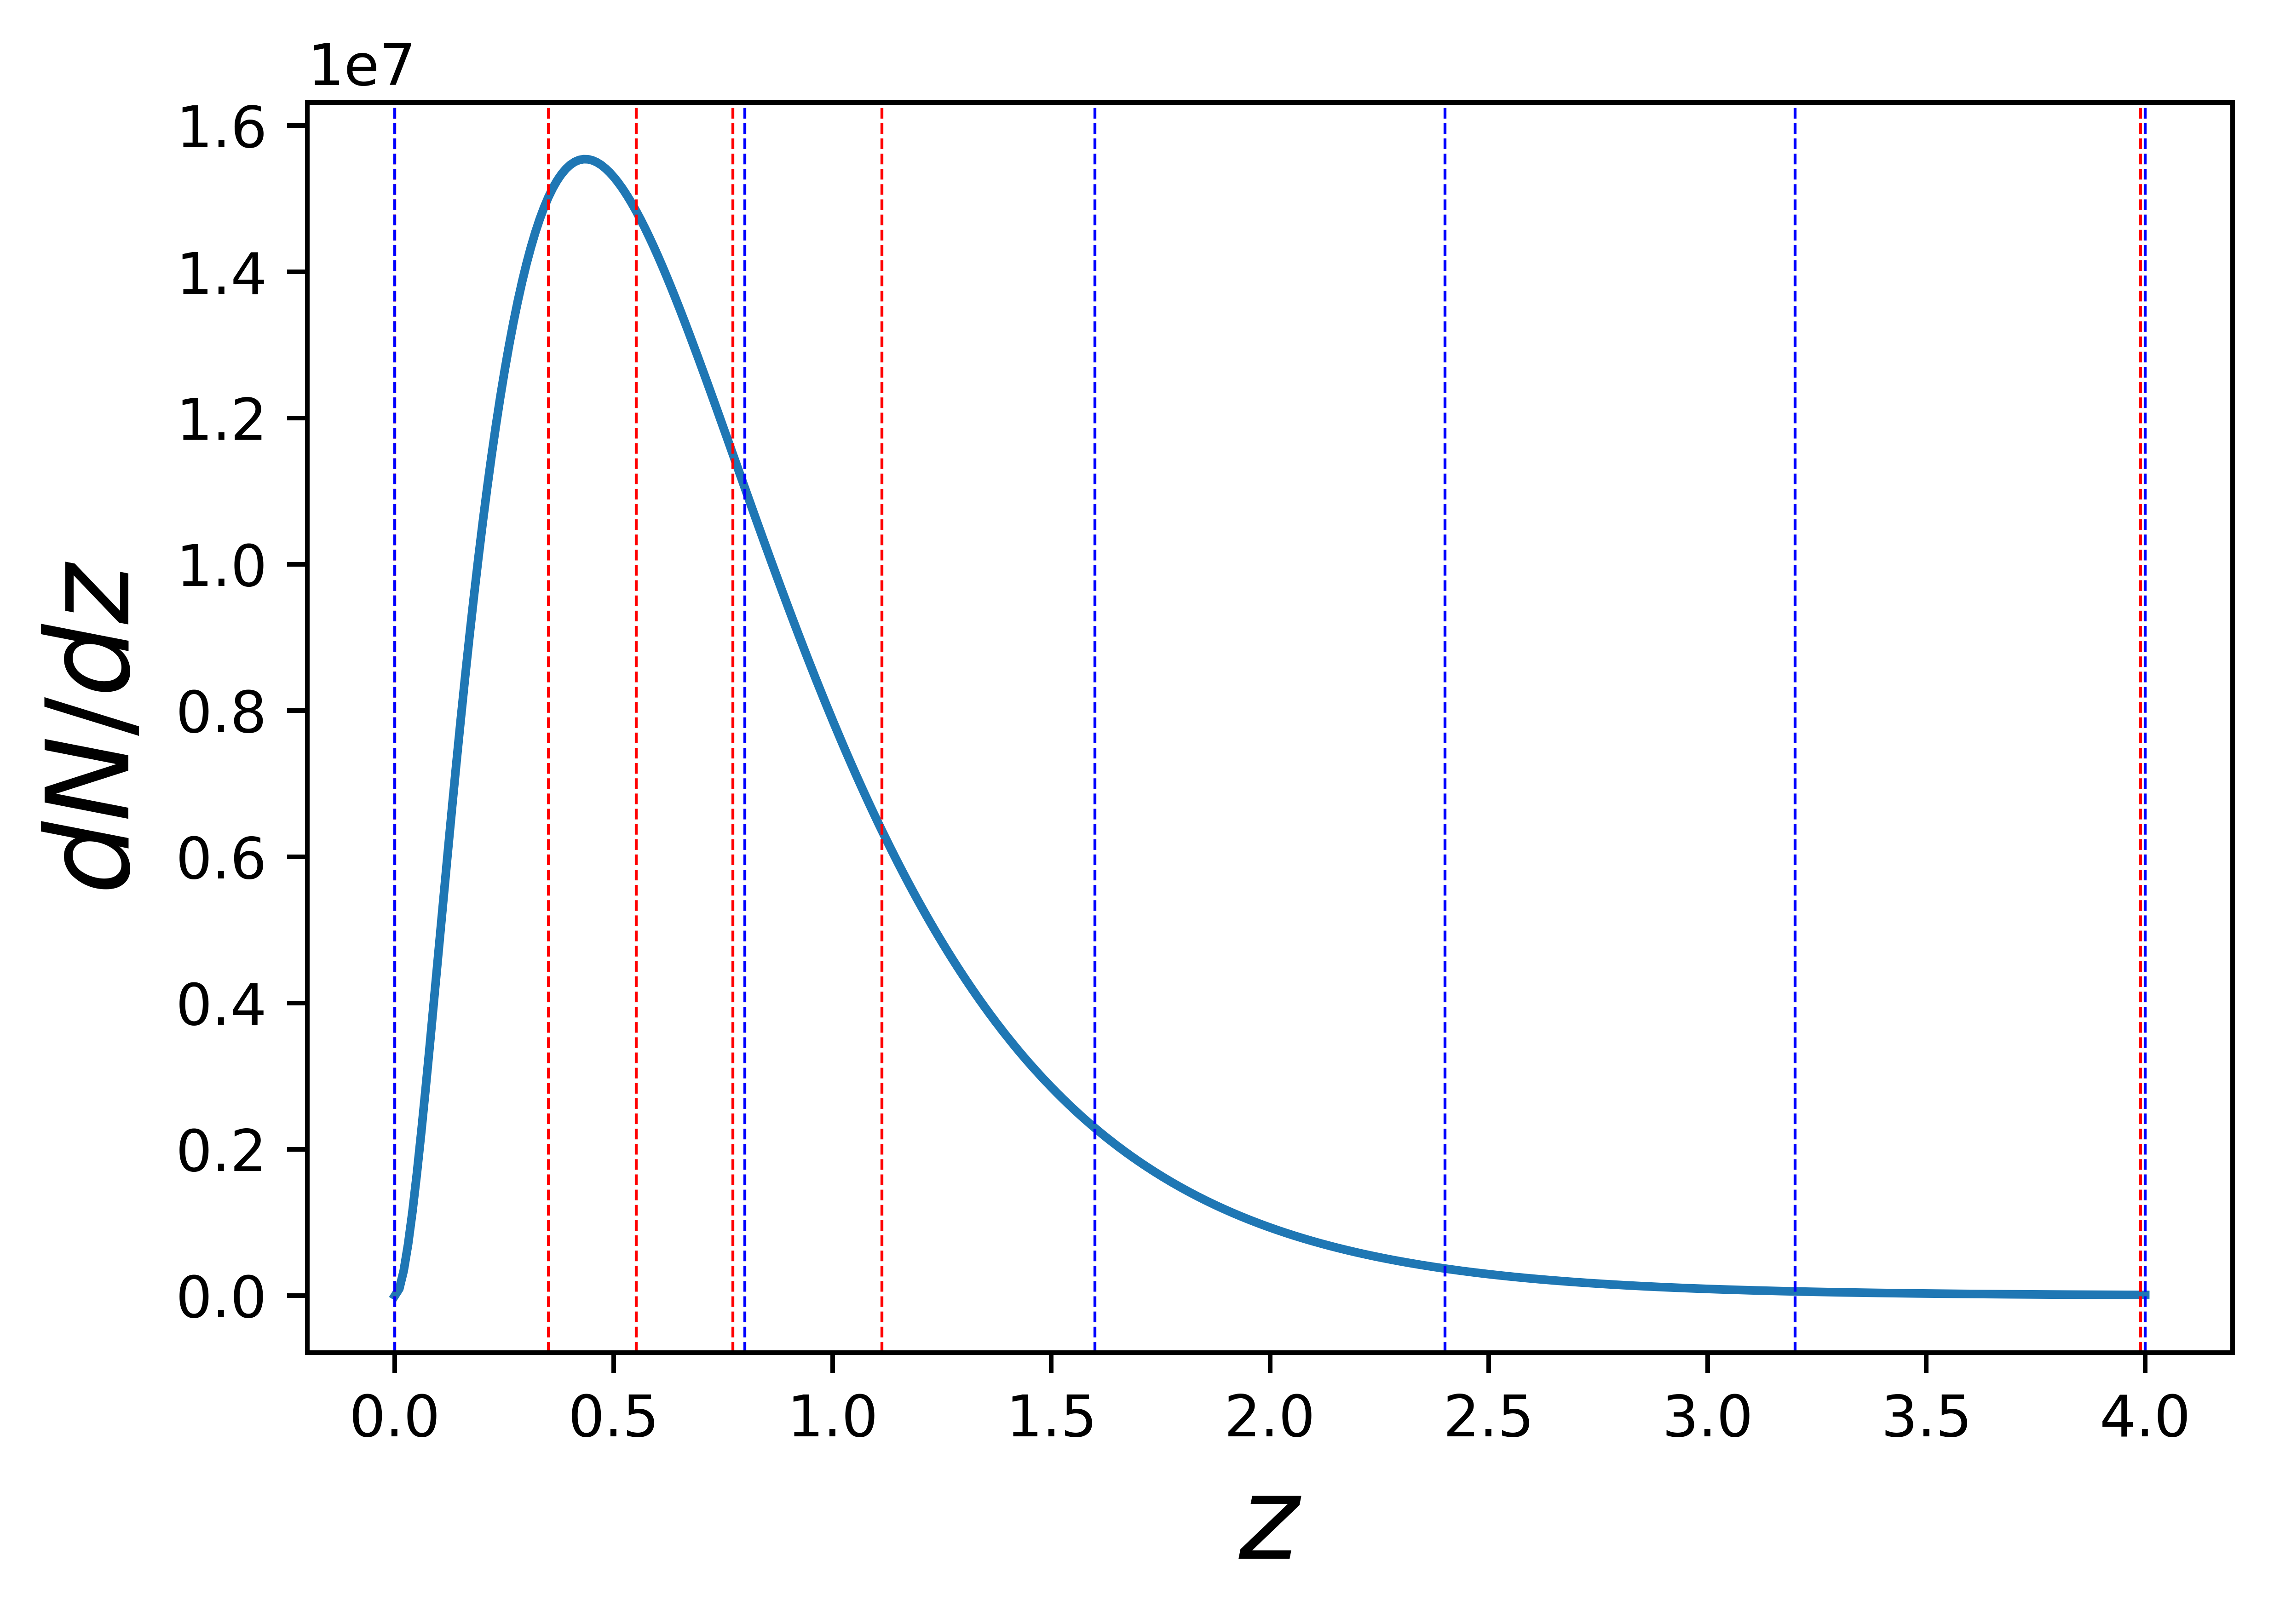

In [113]:
plt.plot(dndz1[:,0], dndz1[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts["n_5"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
for x in redshifts["z_5"]:
    plt.axvline(x, linewidth=0.5, color="b", linestyle="--")
plt.show()

In [ ]:
#